In [5]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.io import arff



In [7]:

# importer les données
train_df = pd.DataFrame(arff.loadarff('KDDTrain+.arff')[0])
test_df = pd.DataFrame(arff.loadarff('KDDTest+.arff')[0])

### Decode byte strings into ordinary strings:
print('Decoding byte strings into ordinary strings. (for train data)')
strings = train_df.select_dtypes([object])
strings = strings.stack().str.decode('utf-8').unstack()
for column in strings:
    train_df[column] = strings[column]
    
print('Decoding byte strings into ordinary strings. (for test data)')
strings = test_df.select_dtypes([object])
strings = strings.stack().str.decode('utf-8').unstack()
for column in strings:
    test_df[column] = strings[column]


Decoding byte strings into ordinary strings. (for train data)
Decoding byte strings into ordinary strings. (for test data)


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [11]:
train_df.select_dtypes([object])

,land,logged_in,is_host_login,is_guest_login,class
0,0,0,0,0,normal
1,0,0,0,0,normal
2,0,0,0,0,anomaly
3,0,1,0,0,normal
4,0,1,0,0,normal
...,...,...,...,...,...
125968,0,0,0,0,anomaly
125969,0,0,0,0,normal
125970,0,1,0,0,normal
125971,0,0,0,0,anomaly


In [13]:
#convertier les chaine en numeric
train_df["land"] = pd.to_numeric(train_df["land"])
train_df["logged_in"] = pd.to_numeric(train_df["logged_in"])
train_df["is_host_login"] = pd.to_numeric(train_df["is_host_login"])
train_df["is_guest_login"] = pd.to_numeric(train_df["is_guest_login"])

test_df["land"] = pd.to_numeric(test_df["land"])
test_df["logged_in"] = pd.to_numeric(test_df["logged_in"])
test_df["is_host_login"] = pd.to_numeric(test_df["is_host_login"])
test_df["is_guest_login"] = pd.to_numeric(test_df["is_guest_login"])

train_df.select_dtypes([object])


,class
0,normal
1,normal
2,anomaly
3,normal
4,normal
...,...
125968,anomaly
125969,normal
125970,normal
125971,anomaly


In [15]:
train_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [17]:
#Encode protocol_type, service and flag 
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

train_df_enc=train_df
test_df_enc=test_df

train_df_enc['protocol_type'] = protocol_type_le.fit_transform(train_df_enc['protocol_type'])
train_df_enc['service'] = service_le.fit_transform(train_df['service'])
train_df_enc['flag'] = flag_le.fit_transform(train_df['flag'])

test_df_enc['protocol_type'] = protocol_type_le.fit_transform(test_df_enc['protocol_type'])
test_df_enc['service'] = service_le.fit_transform(test_df_enc['service'])
test_df_enc['flag'] = flag_le.fit_transform(test_df_enc['flag'])

train_df_enc.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [19]:
train_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  int64  
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  float64
 13 

In [21]:
train_df_enc.duplicated().sum()

9

In [23]:
train_df_enc=train_df_enc.drop_duplicates()

In [25]:
train_df_enc.duplicated().sum()

0

In [27]:
train_df_enc.duplicated().sum()

0

In [32]:
#traindf=traindf.drop("num_outbound_cmds",axis=1)
train_df_enc.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate               

In [55]:
train_df_enc=train_df_enc.drop("num_outbound_cmds",axis=1)
test_df_enc=test_df_enc.drop("num_outbound_cmds",axis=1)


KeyError: "['num_outbound_cmds'] not found in axis"

In [34]:
test_df_enc.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate               

In [35]:
train_df_enc.shape

(125964, 40)

In [36]:
train_df_enc = train_df_enc.drop(['class'], axis=1)
test_df_enc = test_df_enc.drop(['class'], axis=1)
train_df_enc

KeyError: "['class'] not found in axis"

<AxesSubplot:>

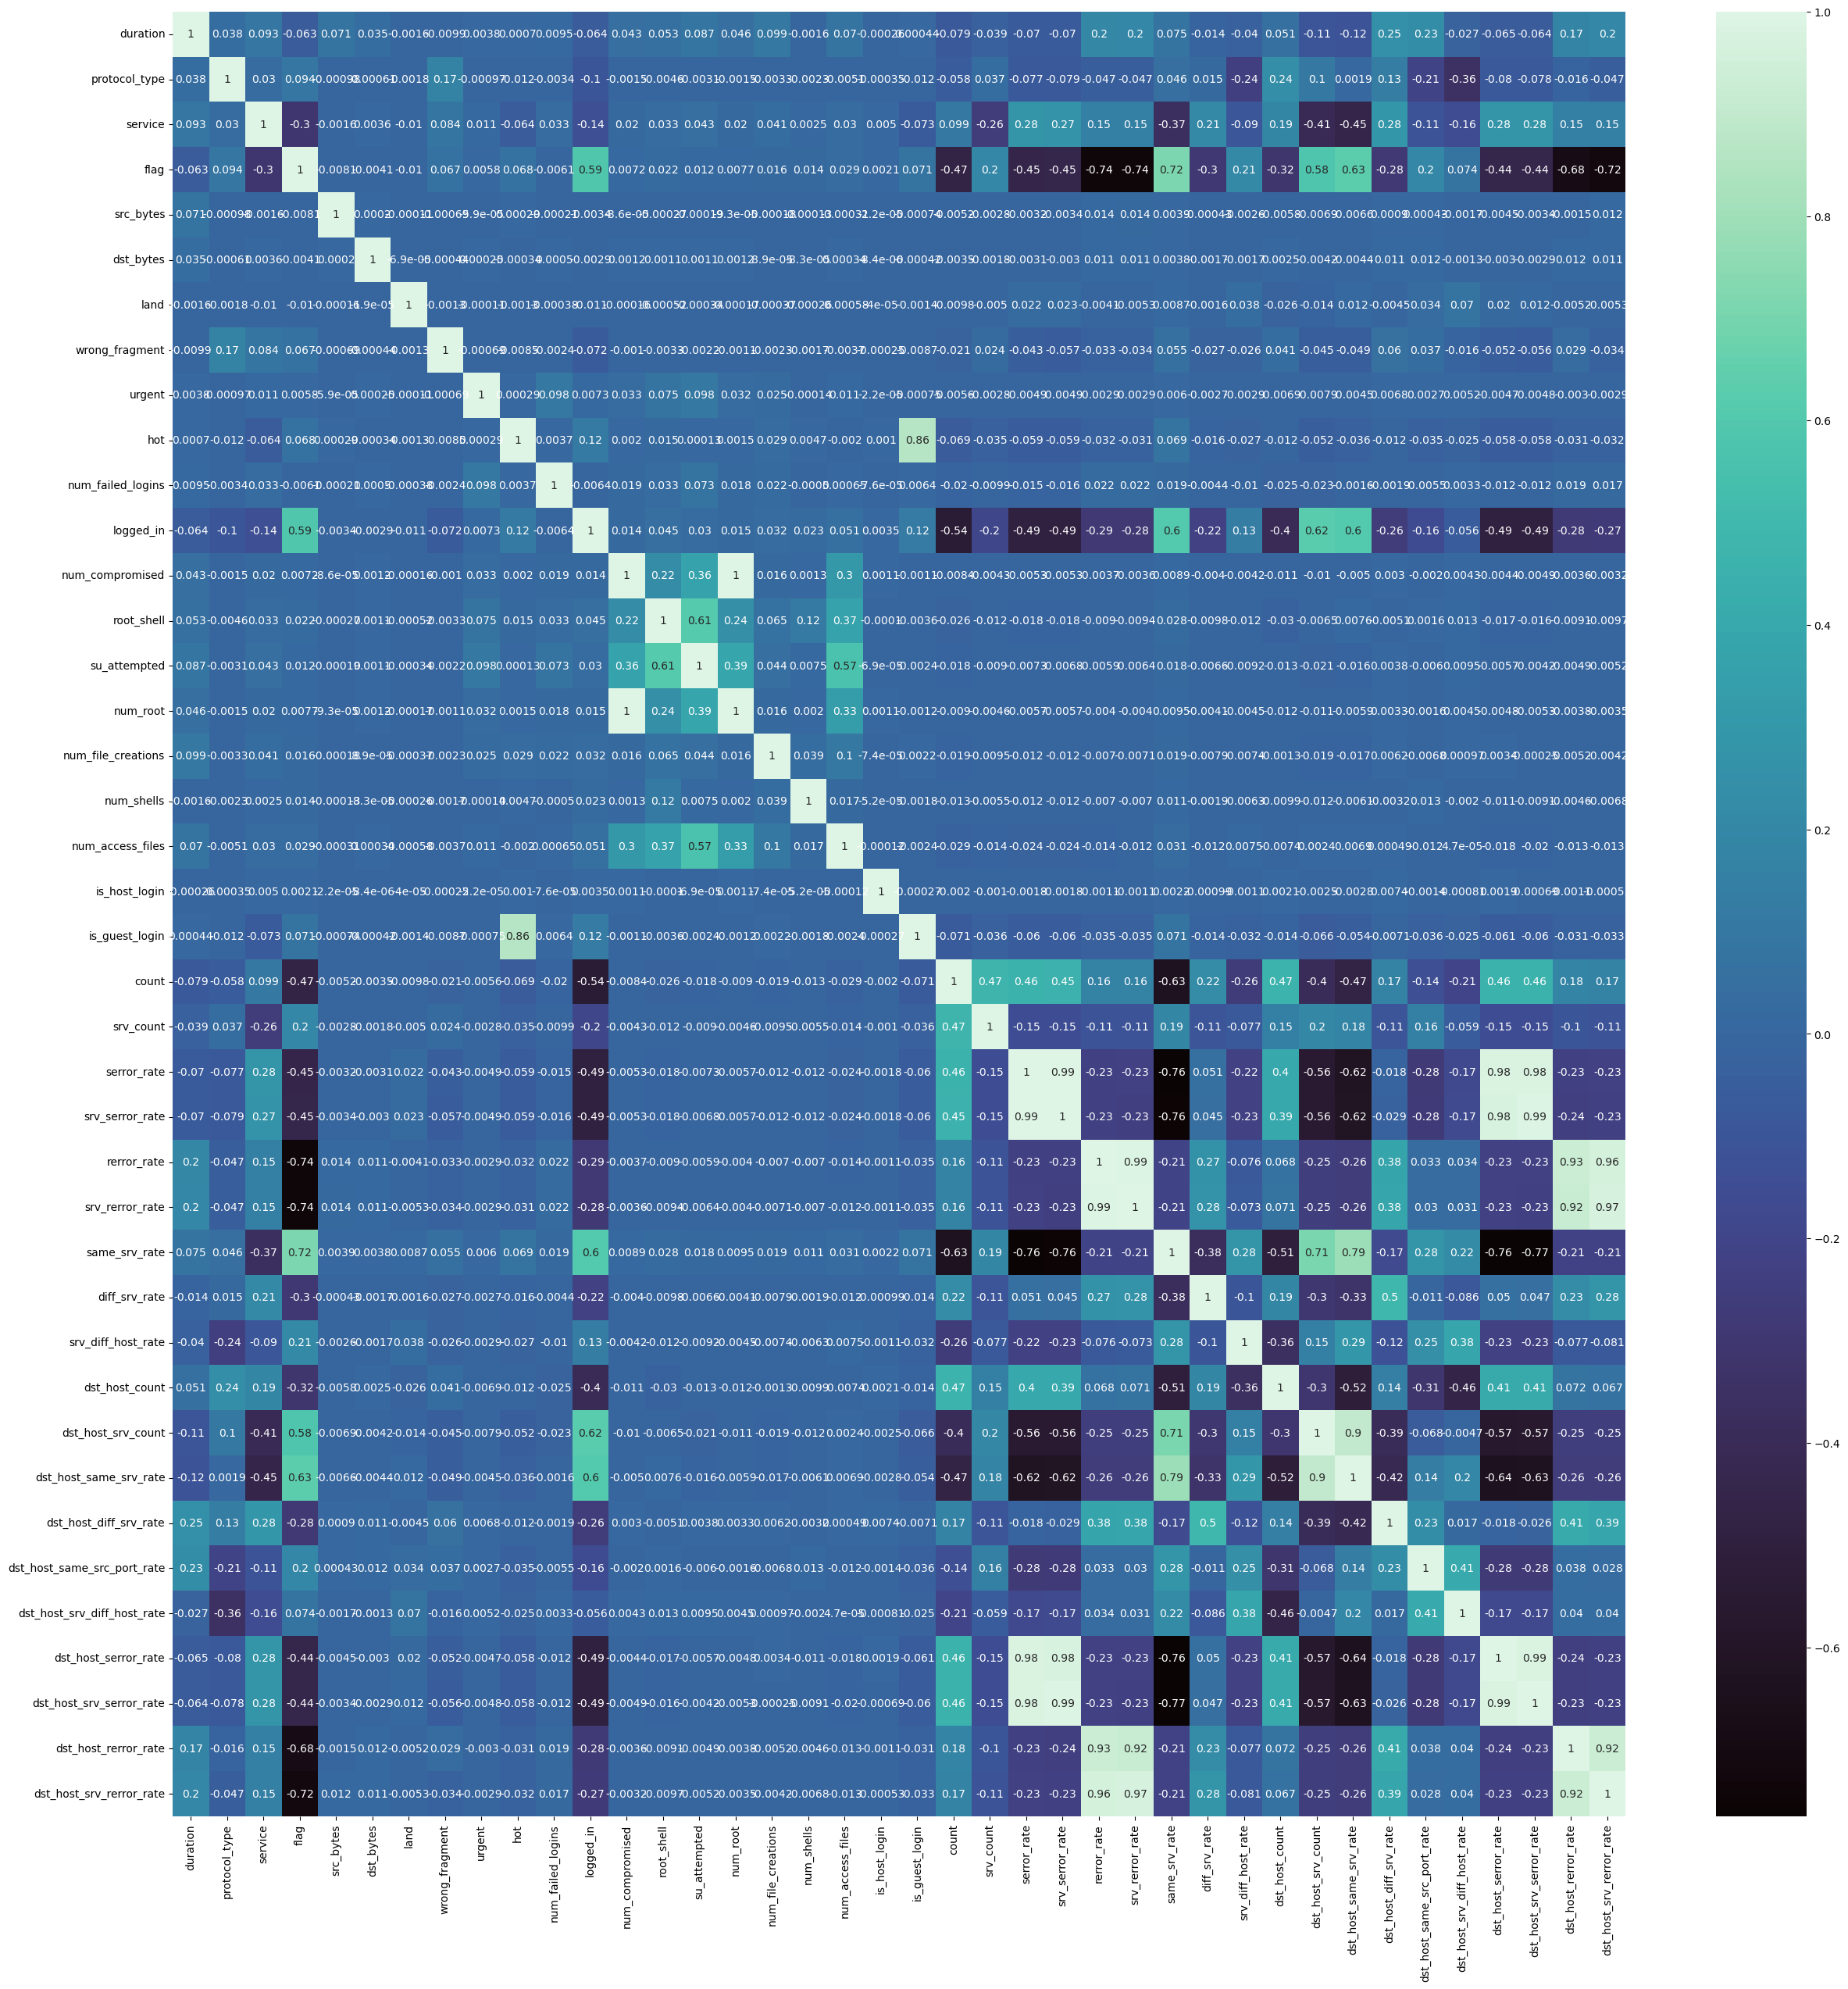

In [39]:
import seaborn as sns


plt.figure(figsize=(30,30))
sns.heatmap(train_df_enc.corr(), annot= True,cmap='mako')

In [40]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
train_df_std=scalar.fit_transform(train_df_enc)
test_df_std = scalar.fit_transform(test_df_enc)
train_df_std


array([[-0.11025321, -0.12490528, -0.68685908, ..., -0.62490184,
        -0.22455329, -0.37640238],
       [-0.11025321,  2.21953949,  0.78135581, ..., -0.62490184,
        -0.38765055, -0.37640238],
       [-0.11025321, -0.12490528,  1.08723391, ...,  1.61887531,
        -0.38765055, -0.37640238],
       ...,
       [-0.11025321, -0.12490528,  1.39311201, ..., -0.62490184,
        -0.3550311 , -0.37640238],
       [-0.11025321, -0.12490528, -0.07510288, ...,  1.61887531,
        -0.38765055, -0.37640238],
       [-0.11025321, -0.12490528, -0.68685908, ..., -0.62490184,
        -0.38765055, -0.37640238]])

In [41]:
features= train_df_enc.columns
train_df_std = pd.DataFrame(train_df_std,columns = features ) 
test_df_std = pd.DataFrame(test_df_std,columns = features ) 
train_df_std

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110253,-0.124905,-0.686859,0.751153,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402
1,-0.110253,2.219539,0.781356,0.751153,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
2,-0.110253,-0.124905,1.087234,-0.736170,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402
3,-0.110253,-0.124905,-0.442157,0.751153,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,...,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100
4,-0.110253,-0.124905,-0.442157,0.751153,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,...,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110253,-0.124905,1.087234,-0.736170,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,0.734273,-0.818965,-0.938215,-0.121513,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402
125960,-0.107182,2.219539,1.087234,0.751153,-0.007745,-0.004883,-0.014089,-0.08949,-0.007736,-0.095079,...,0.734273,1.159318,0.977385,-0.386166,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
125961,-0.110253,-0.124905,1.393112,0.751153,-0.007382,-0.004823,-0.014089,-0.08949,-0.007736,-0.095079,...,0.734273,-0.773799,-0.893667,-0.121513,-0.480113,-0.289115,0.979171,-0.624902,-0.355031,-0.376402
125962,-0.110253,-0.124905,-0.075103,-0.736170,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,...,0.734273,-0.972530,-1.094136,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402


<AxesSubplot:>

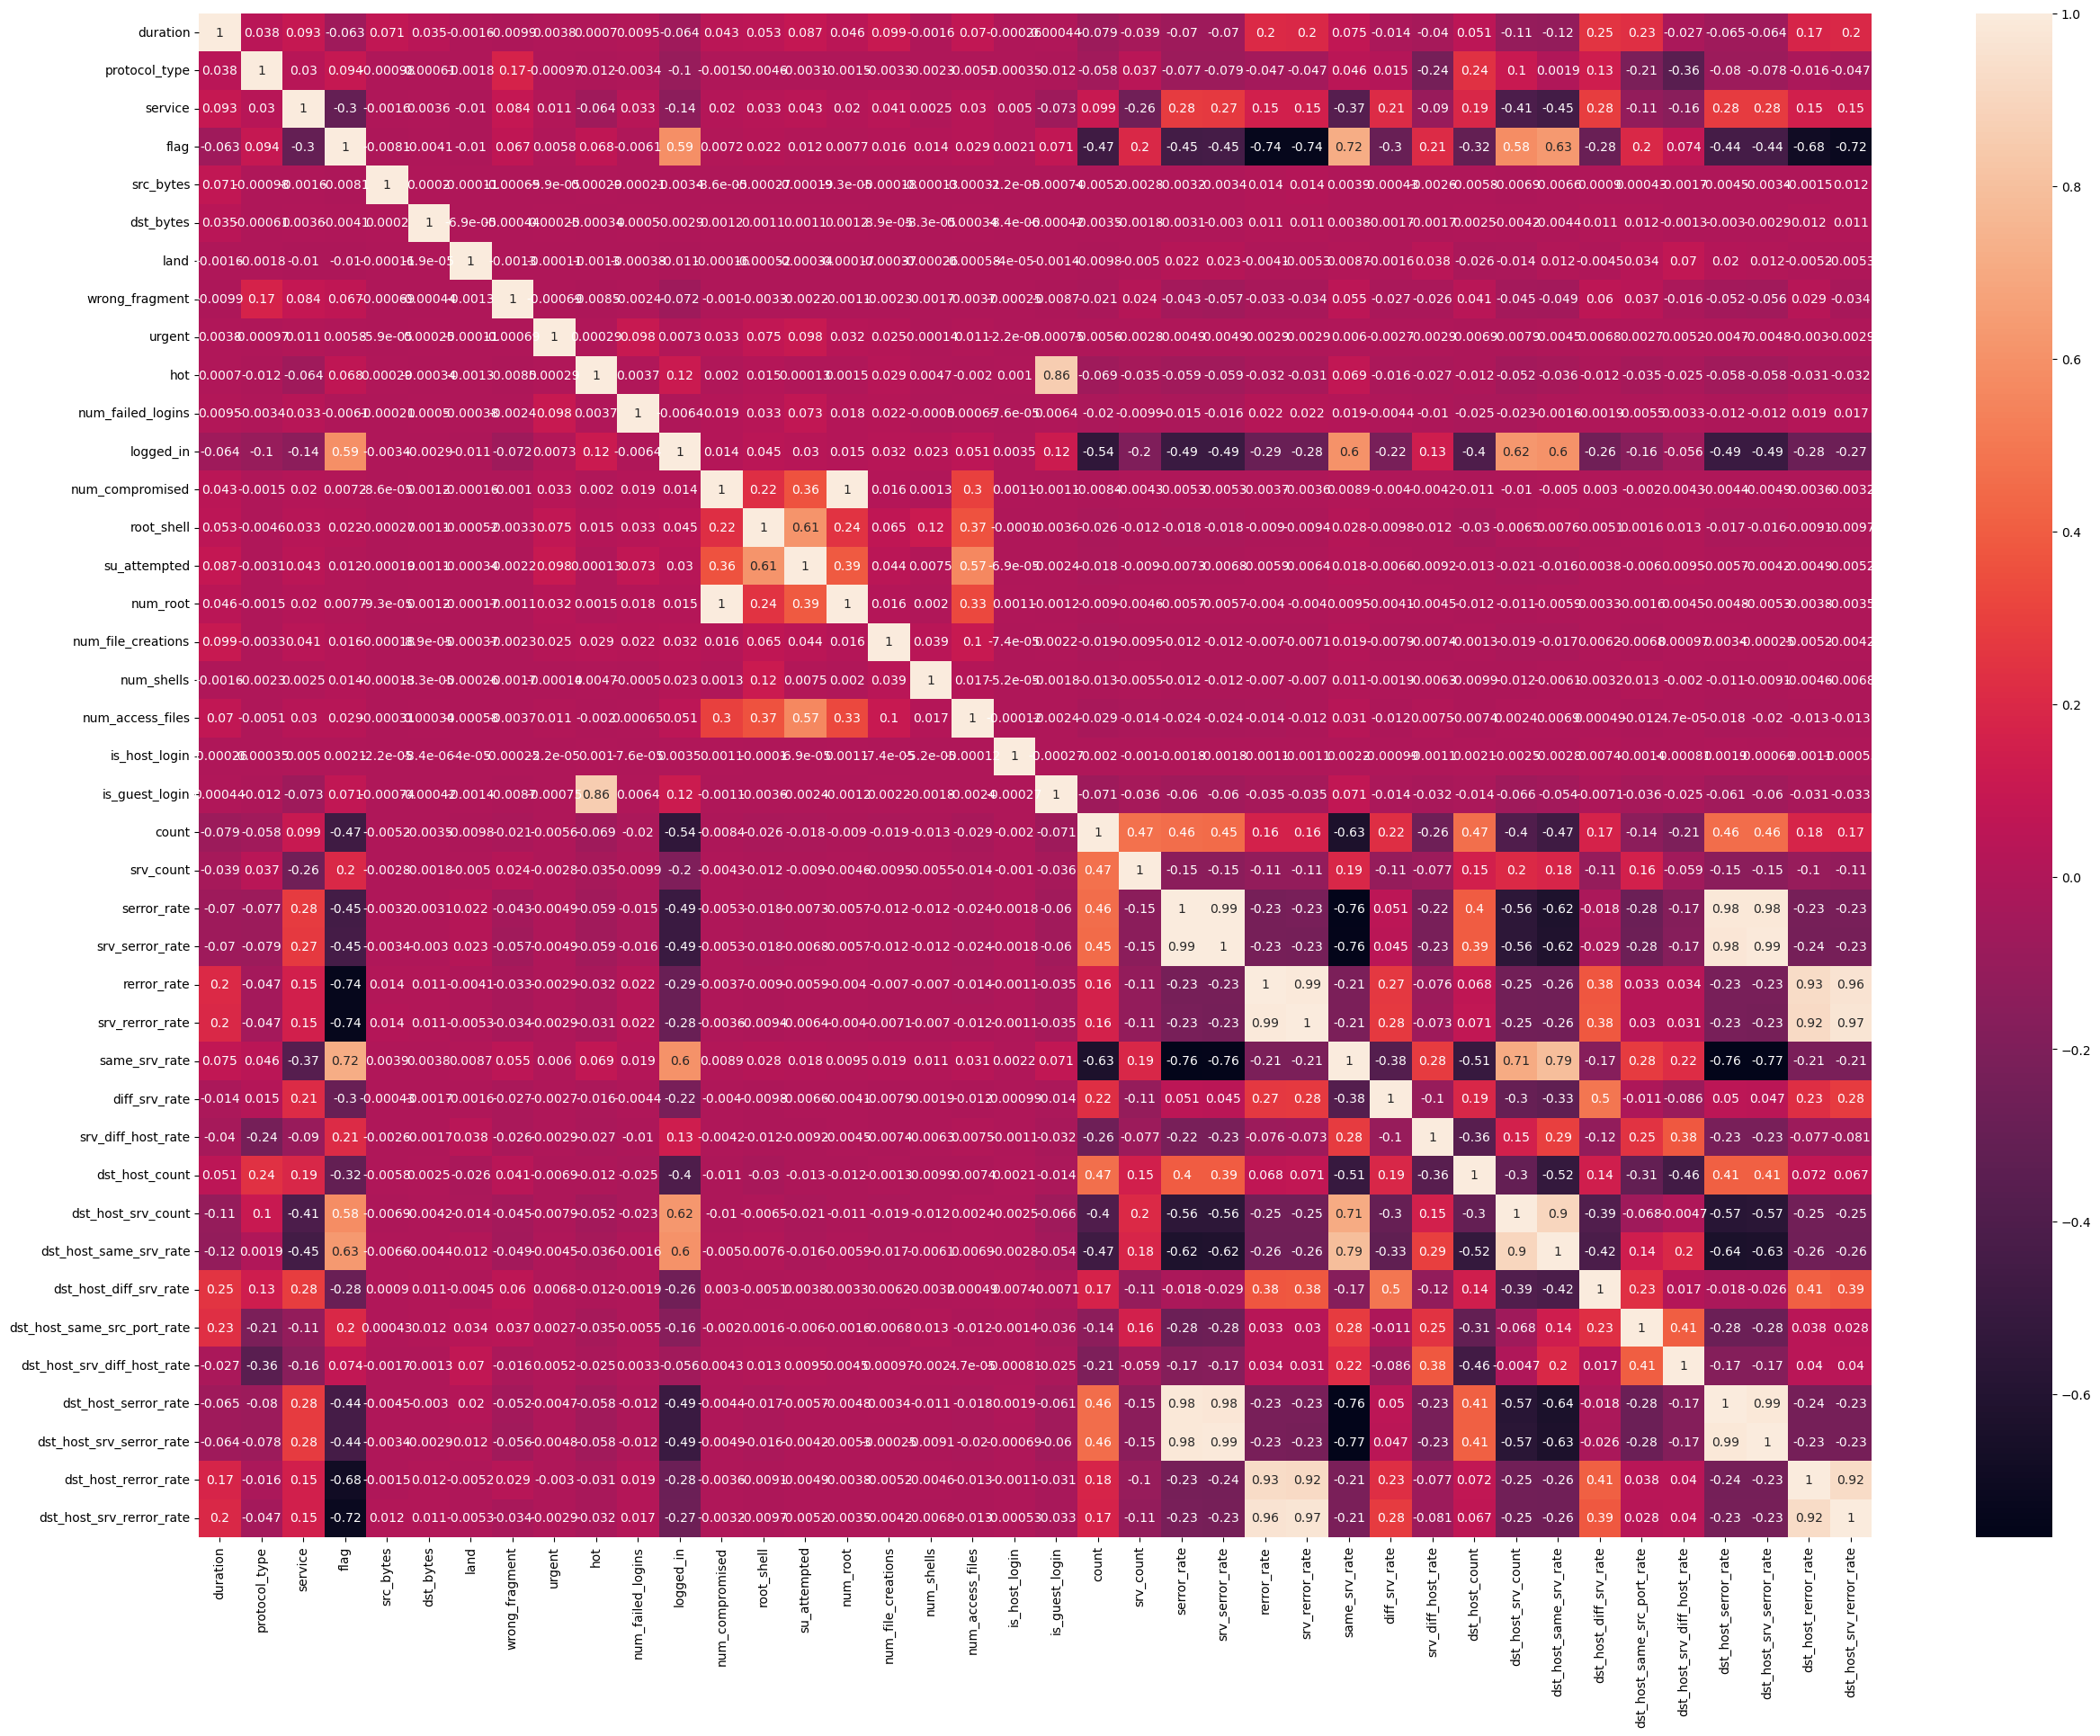

In [42]:
plt.figure(figsize=(30,22))
plt.rcParams['font.size']=10
sns.heatmap(train_df_std.corr(), annot=True)

Nombre de composantes calculées :  40


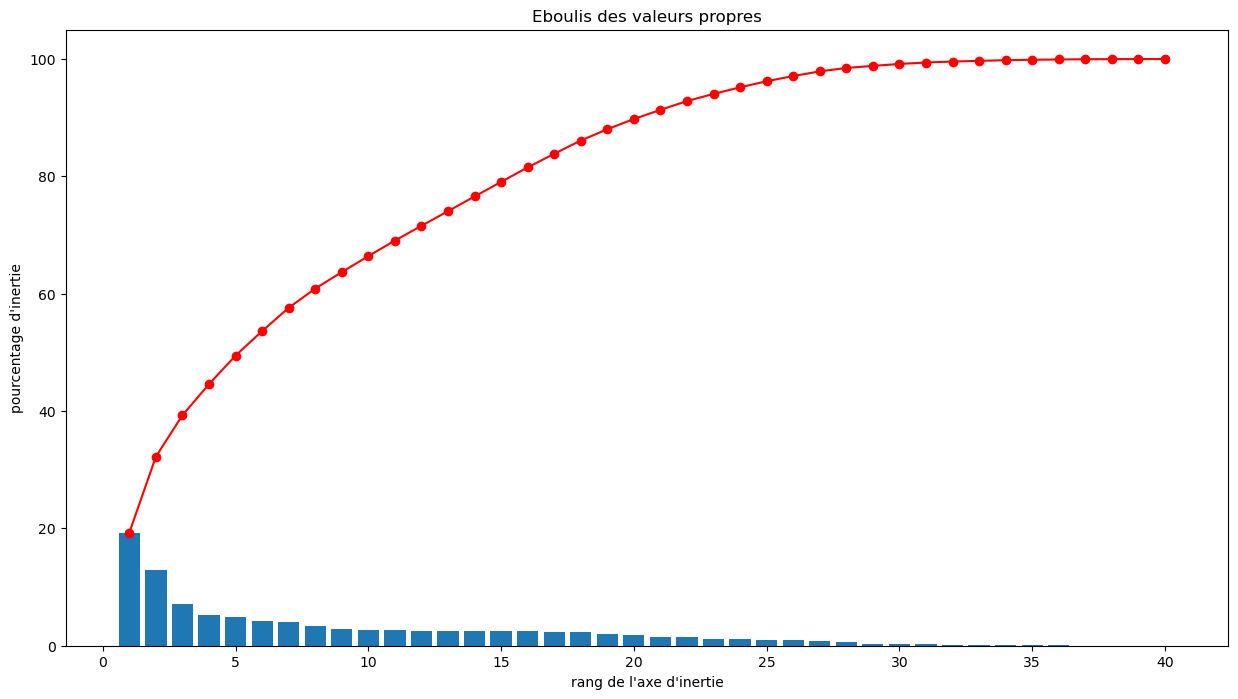

PCA(n_components=40)

In [43]:
from sklearn.decomposition import PCA

# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


n_comp = 20

# Calcul des composantes principales
pca = PCA(40)
pca.fit(train_df_std)
print('Nombre de composantes calculées : ', pca.n_components_)

# Eboulis des valeurs propres
plt.figure( figsize = ( 15, 8)) 
display_scree_plot(pca)
pca

<AxesSubplot:>

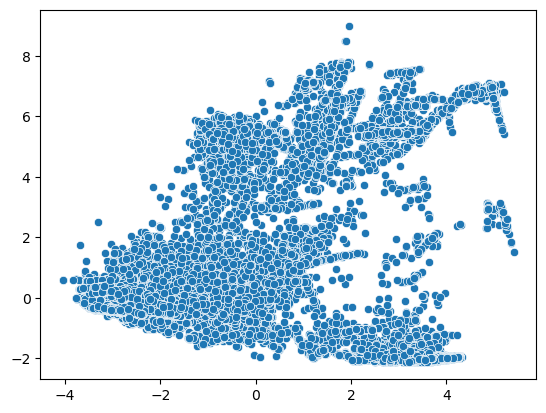

In [44]:
#appliquer le PCA pour avoir 2 composants (n_components=2) 
# du moment que 2 composants nous permettent d'avoir 100% de l'information
pca = PCA(n_components=21).fit(train_df_std)
train_normalized_pca = pca.transform(train_df_std)


# dessiner les projections de train_normalized_pca sur les deux composantes qu'on a trouvé en utlisant PCA
sns.scatterplot(data=train_normalized_pca, x=train_normalized_pca[:, 0], y=train_normalized_pca[:, 1], alpha=1)

In [45]:
features_pca=['PC'+str(i+1) for i in range(pca.n_components_)]
train_normalized_pcadf = pd.DataFrame(train_normalized_pca,columns=features_pca)
train_normalized_pcadf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-0.983137,-0.109596,-0.036887,0.033198,-0.132707,0.296454,-0.531780,0.108956,0.136279,0.098341,...,0.030850,-0.004571,-0.008838,-0.111143,0.053783,-0.268161,0.014275,0.501901,-0.337138,-0.098078
1,0.587402,0.714744,0.085892,-0.424190,-0.211372,1.353734,-3.773023,0.749027,-0.760443,-0.122328,...,-0.191550,-0.036444,-0.045175,0.249291,0.055472,-0.554443,0.000370,1.299419,0.429686,-1.111288
2,3.627226,-2.008058,0.049757,0.342164,-0.169091,-0.503842,-0.040512,0.021588,0.163113,0.045755,...,0.007383,0.017145,-0.006617,-0.083203,-0.016431,-0.055888,0.000129,-0.208678,0.131761,-0.233728
3,-2.629791,-0.622252,-0.066081,-0.018262,-0.048656,-1.057966,0.370531,0.045167,0.060508,-0.050518,...,-0.033917,0.001924,-0.008010,0.061488,0.015704,-0.099265,0.023299,0.068783,-0.920890,-0.001187
4,-2.418726,-0.538535,-0.122130,-1.066907,0.332695,-0.574803,0.327401,-0.018445,0.016479,-0.144960,...,-0.047693,0.011447,-0.000533,0.127465,-0.062469,-0.004963,0.025392,-0.414368,0.006977,0.372967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,3.670495,-2.009957,0.026305,0.237210,0.021003,-0.158858,0.080277,-0.044832,0.140666,0.041583,...,0.022033,0.017715,-0.001465,-0.084364,-0.030703,-0.000127,-0.020759,-0.379734,0.151970,-0.301325
125960,-1.598506,-0.367389,-0.070906,-1.824297,0.484401,-0.618369,-1.066190,0.268715,0.232492,0.257845,...,-0.050804,0.000607,0.003931,0.142786,-0.038810,-0.264157,0.017602,0.774644,1.046404,-1.049440
125961,-0.412543,-0.637765,0.144151,-0.541929,-0.614257,-1.014071,-1.083580,0.167230,-0.023828,-0.037107,...,0.062703,0.025156,-0.001266,-0.074935,-0.072191,-0.007232,-0.066841,-1.255813,-0.005553,-0.617883
125962,3.559596,-2.052565,-0.012612,0.331907,-0.053461,-0.131054,0.344482,-0.048115,0.270092,0.031844,...,-0.005873,0.010824,-0.003693,-0.052028,0.010630,-0.169427,0.059744,0.362989,-0.091873,0.255215


<AxesSubplot:>

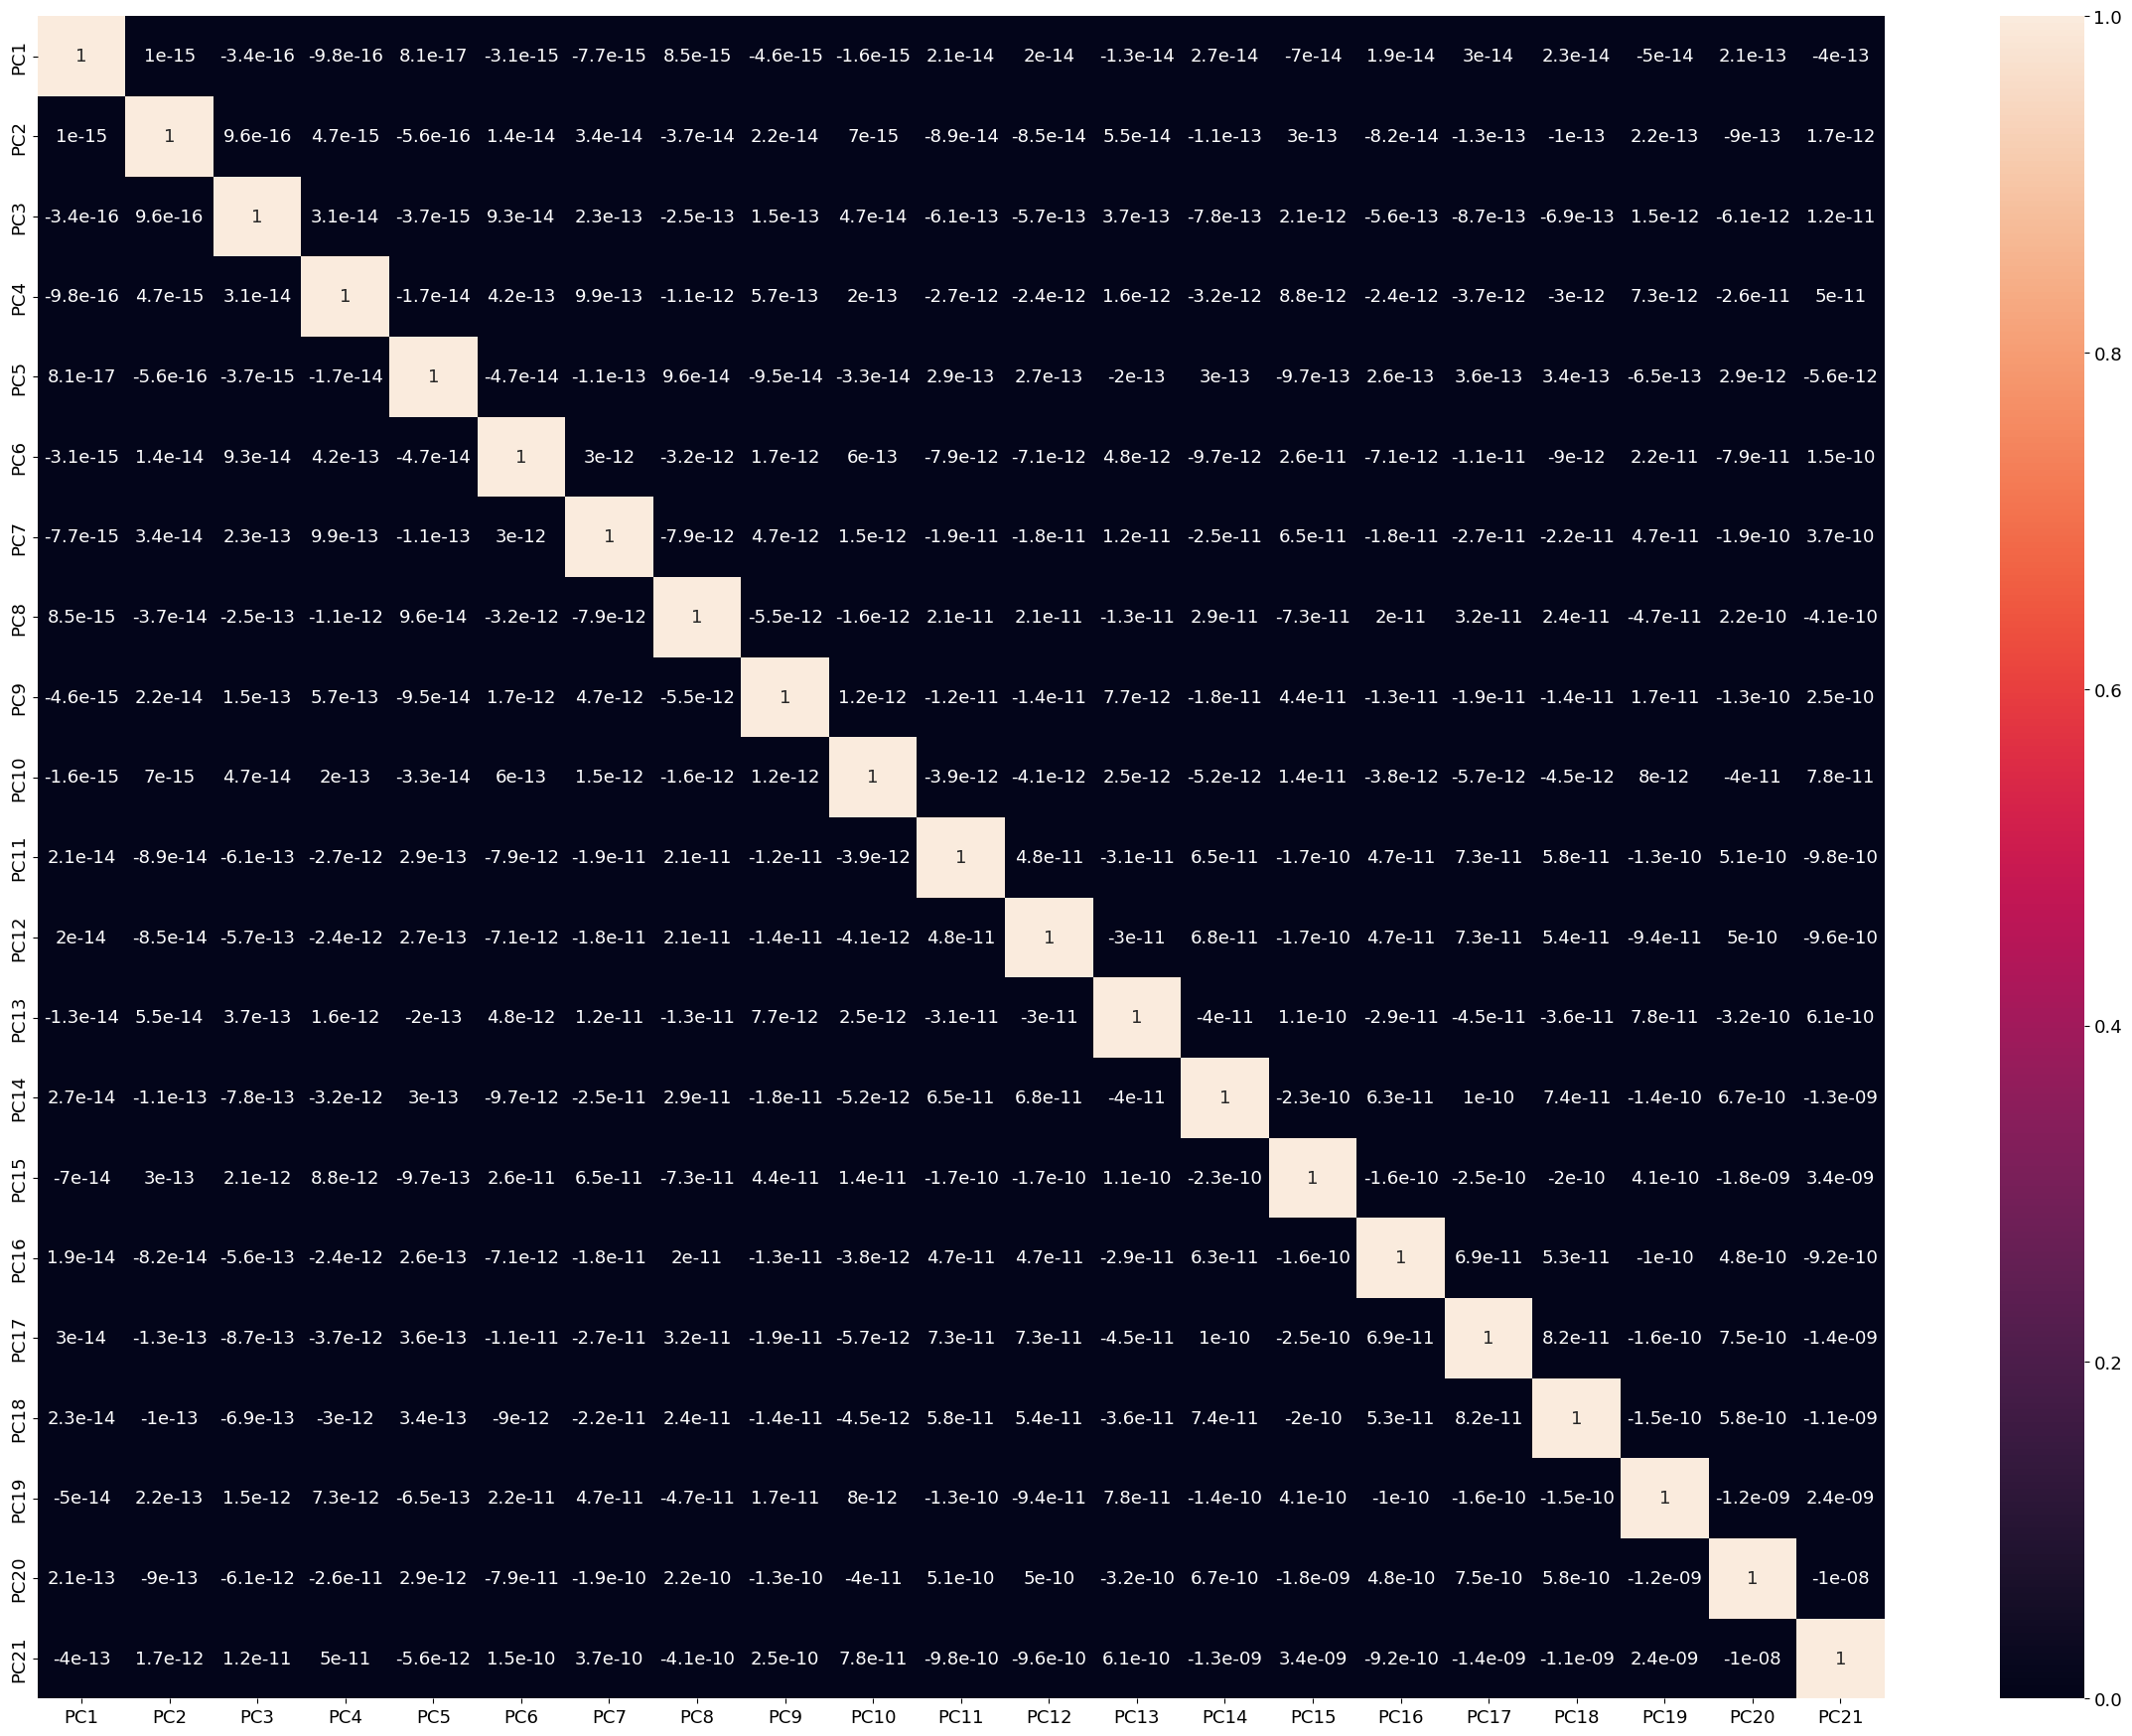

In [46]:
plt.figure(figsize=(30,22))
plt.rcParams['font.size']=13
sns.heatmap(train_normalized_pcadf.corr(), annot=True)


In [47]:
On voit ici que la correlation est minime entre les differentes features, donc le PCA a bien éliminé la correlation entre les features

SyntaxError: invalid syntax (1045384561.py, line 1)

<h2>Gaussian Mixture Probability Model</h2>

<h3> Gaussian Mixture Probability Model¶ </h3>

...


In [48]:
from sklearn import mixture
#on lance GaussianMixture avec le paramètrre n_components=2 parce que on vaut classifier en 2 groupes (attacked, not attacked)
gmm = mixture.GaussianMixture(n_components=2).fit(train_normalized_pca)

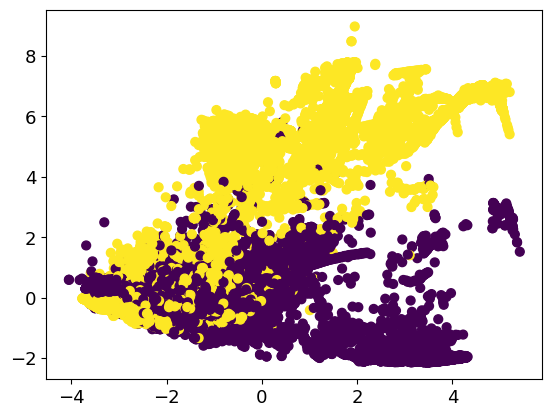

In [49]:
#Predict the data
y_gmm = gmm.predict(train_normalized_pca)
plt.scatter(train_normalized_pca[:,0], train_normalized_pca[:,1], c=y_gmm, s=40, cmap='viridis');

In [50]:
probs = gmm.predict_proba(train_normalized_pca)
print(probs[:5].round(3))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


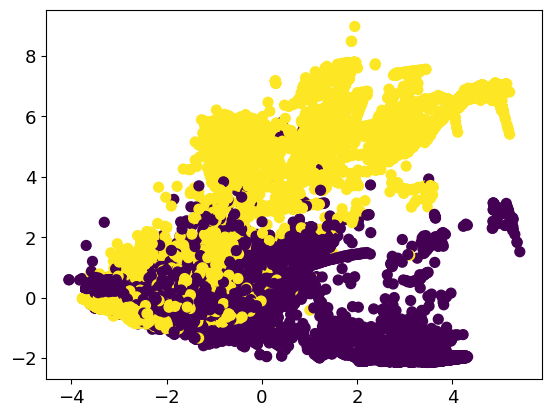

In [51]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(train_normalized_pca[:,0], train_normalized_pca[:,1], c=y_gmm, cmap='viridis', s=size);

In [52]:
y_gmm[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [53]:
#Brouillon
train_df2=train_df
train_df2['class_pred'] = pd.Series(y_gmm)
#train_df2[(train_df2['class_pred']>0) & (train_df2['class']=='normal')]
train_df2
train_f=train_df2[(train_df2['class_pred']>0) & (train_df2['class']=='normal') |(train_df2['class_pred']<1) & (train_df2['class']=='anomaly')]
train_c=train_df2[(train_df2['class_pred']>0) & (train_df2['class']=='anomaly') |(train_df2['class_pred']<1) & (train_df2['class']=='normal')]
print ( "shape globale " + str(train_df2.shape[0])+" shape f " + str(train_f.shape[0])+" shape c " + str(train_c.shape[0]))


shape globale 125973 shape f 69385 shape c 56579


In [56]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) 

BIRCH est un algorithme de clustering hiérarchique qui a été conçu pour gérer des ensembles de données volumineux et pour fonctionner efficacement avec des contraintes de mémoire. Voici une explication du théorème BIRCH :

Construction de la Structure CF (Clustering Feature) :

BIRCH utilise une structure appelée Clustering Feature (CF) pour représenter chaque cluster. Un CF comprend des informations agrégées telles que la somme, la somme des carrés et le nombre d'éléments dans le cluster.
Balanced Iterative Reducing :

L'algorithme suit une approche itérative pour construire et ajuster la structure CF tout en maintenant un équilibre entre la taille de la structure et la précision du clustering.
La structure est ajustée à mesure que de nouvelles données sont ajoutées, et les clusters peuvent fusionner si nécessaire.
Utilisation de la Structure CF pour le Clustering :

Une fois la structure CF construite, elle est utilisée pour effectuer le clustering. Les points de données sont affectés au cluster dont le CF est le plus proche.

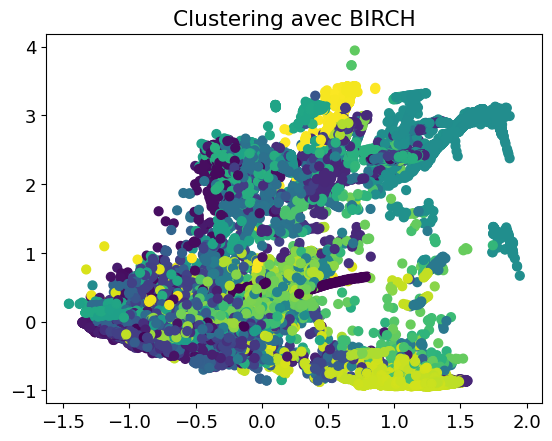

Shape globale 125973 Shape F 67370 Shape C 58594


In [69]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardiser les données si nécessaire
scaler = StandardScaler()
train_normalized_pca_standardized = scaler.fit_transform(train_normalized_pca)

# Appliquer l'algorithme BIRCH
birch = Birch(branching_factor=50, threshold=0.5, n_clusters=None)
birch.fit(train_normalized_pca_standardized)

# Prédire les clusters
y_birch = birch.predict(train_normalized_pca_standardized)

# Visualiser les résultats du clustering
plt.scatter(train_normalized_pca_standardized[:, 0], train_normalized_pca_standardized[:, 1], c=y_birch, s=40, cmap='viridis')
plt.title('Clustering avec BIRCH')
plt.show()

# Filtrer les données en fonction des clusters prédits
train_df2['class_pred_birch'] = pd.Series(y_birch)
train_f_birch = train_df2[(train_df2['class_pred_birch'] > 0) & (train_df2['class'] == 'normal') | 
                          (train_df2['class_pred_birch'] < 1) & (train_df2['class'] == 'anomaly')]
train_c_birch = train_df2[(train_df2['class_pred_birch'] > 0) & (train_df2['class'] == 'anomaly') | 
                          (train_df2['class_pred_birch'] < 1) & (train_df2['class'] == 'normal')]

# Afficher les informations sur la forme des clusters
print("Shape globale " + str(train_df2.shape[0]) + " Shape F " + str(train_f_birch.shape[0]) + 
      " Shape C " + str(train_c_birch.shape[0]))


# Théorème OPTICS (Ordering Points To Identify the Clustering Structure) :

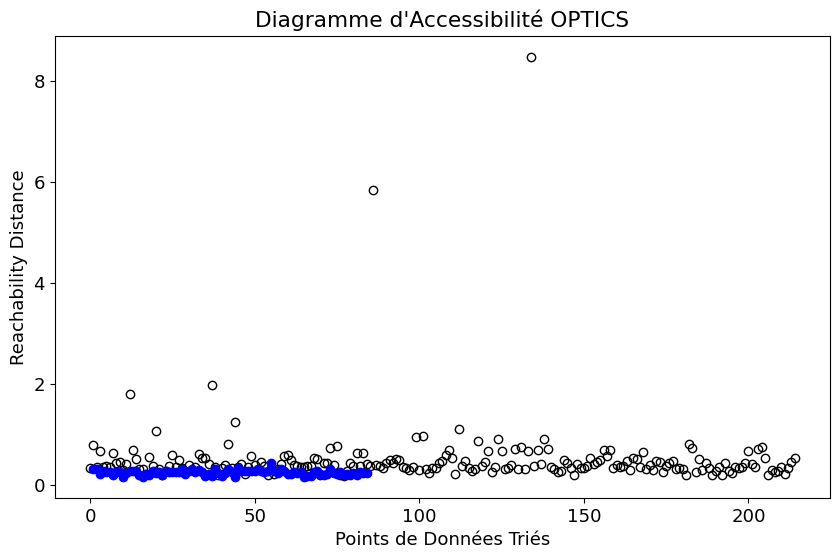

In [70]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  # Importer une fonction pour générer des données fictives

# Générer des données fictives (remplacez cela par le chargement de vos propres données)
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Appliquer l'algorithme OPTICS
optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
optics_model.fit(data)

# Visualiser les résultats
labels = optics_model.labels_
reachability = optics_model.reachability_

plt.figure(figsize=(10, 6))

# Tracez le diagramme d'accessibilité
plt.plot(reachability[labels == -1], 'o', markersize=6, color='k', mfc='none')
plt.plot(reachability[labels != -1], 'o', markersize=6, color='b')

plt.title('Diagramme d\'Accessibilité OPTICS')
plt.xlabel('Points de Données Triés')
plt.ylabel('Reachability Distance')
plt.show()
